
                                          Capstone Project

In [2]:
# Step 1: Raw data collection :  Click the hyperlink to download the dataset  - Hyperlink

In [3]:
# Step 2:  Importing the necessary packages in JupyterNotebook/ Any IDE

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.graph_objects as go

In [4]:
# Step 3: Import the dataset using pandas 

df=pd.read_csv("Dentistry Dataset.csv")

In [5]:
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [6]:
df.describe()

,Sl No,Sample ID,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,0.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,550.500000,NaN,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,317.686953,NaN,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,1.000000,NaN,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,275.750000,NaN,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,550.500000,NaN,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,825.250000,NaN,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,1100.000000,NaN,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [7]:
# Step 4:   Data Preprocessing


In [8]:

# i) Identify and handle missing values

df.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [9]:
df = df.drop(['Sample ID','Sl No'], axis=1)


In [10]:
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1100 non-null   int64  
 1   Gender                           1100 non-null   object 
 2   inter canine distance intraoral  1100 non-null   float64
 3   intercanine distance casts       1100 non-null   float64
 4   right canine width intraoral     1100 non-null   float64
 5   right canine width casts         1100 non-null   float64
 6   left canine width intraoral      1100 non-null   float64
 7   left canine width casts          1100 non-null   float64
 8   right canine index intra oral    1100 non-null   float64
 9   right canine index casts         1100 non-null   float64
 10  left canine index intraoral      1100 non-null   float64
 11  left canine index casts          1100 non-null   float64
dtypes: float64(10), int6

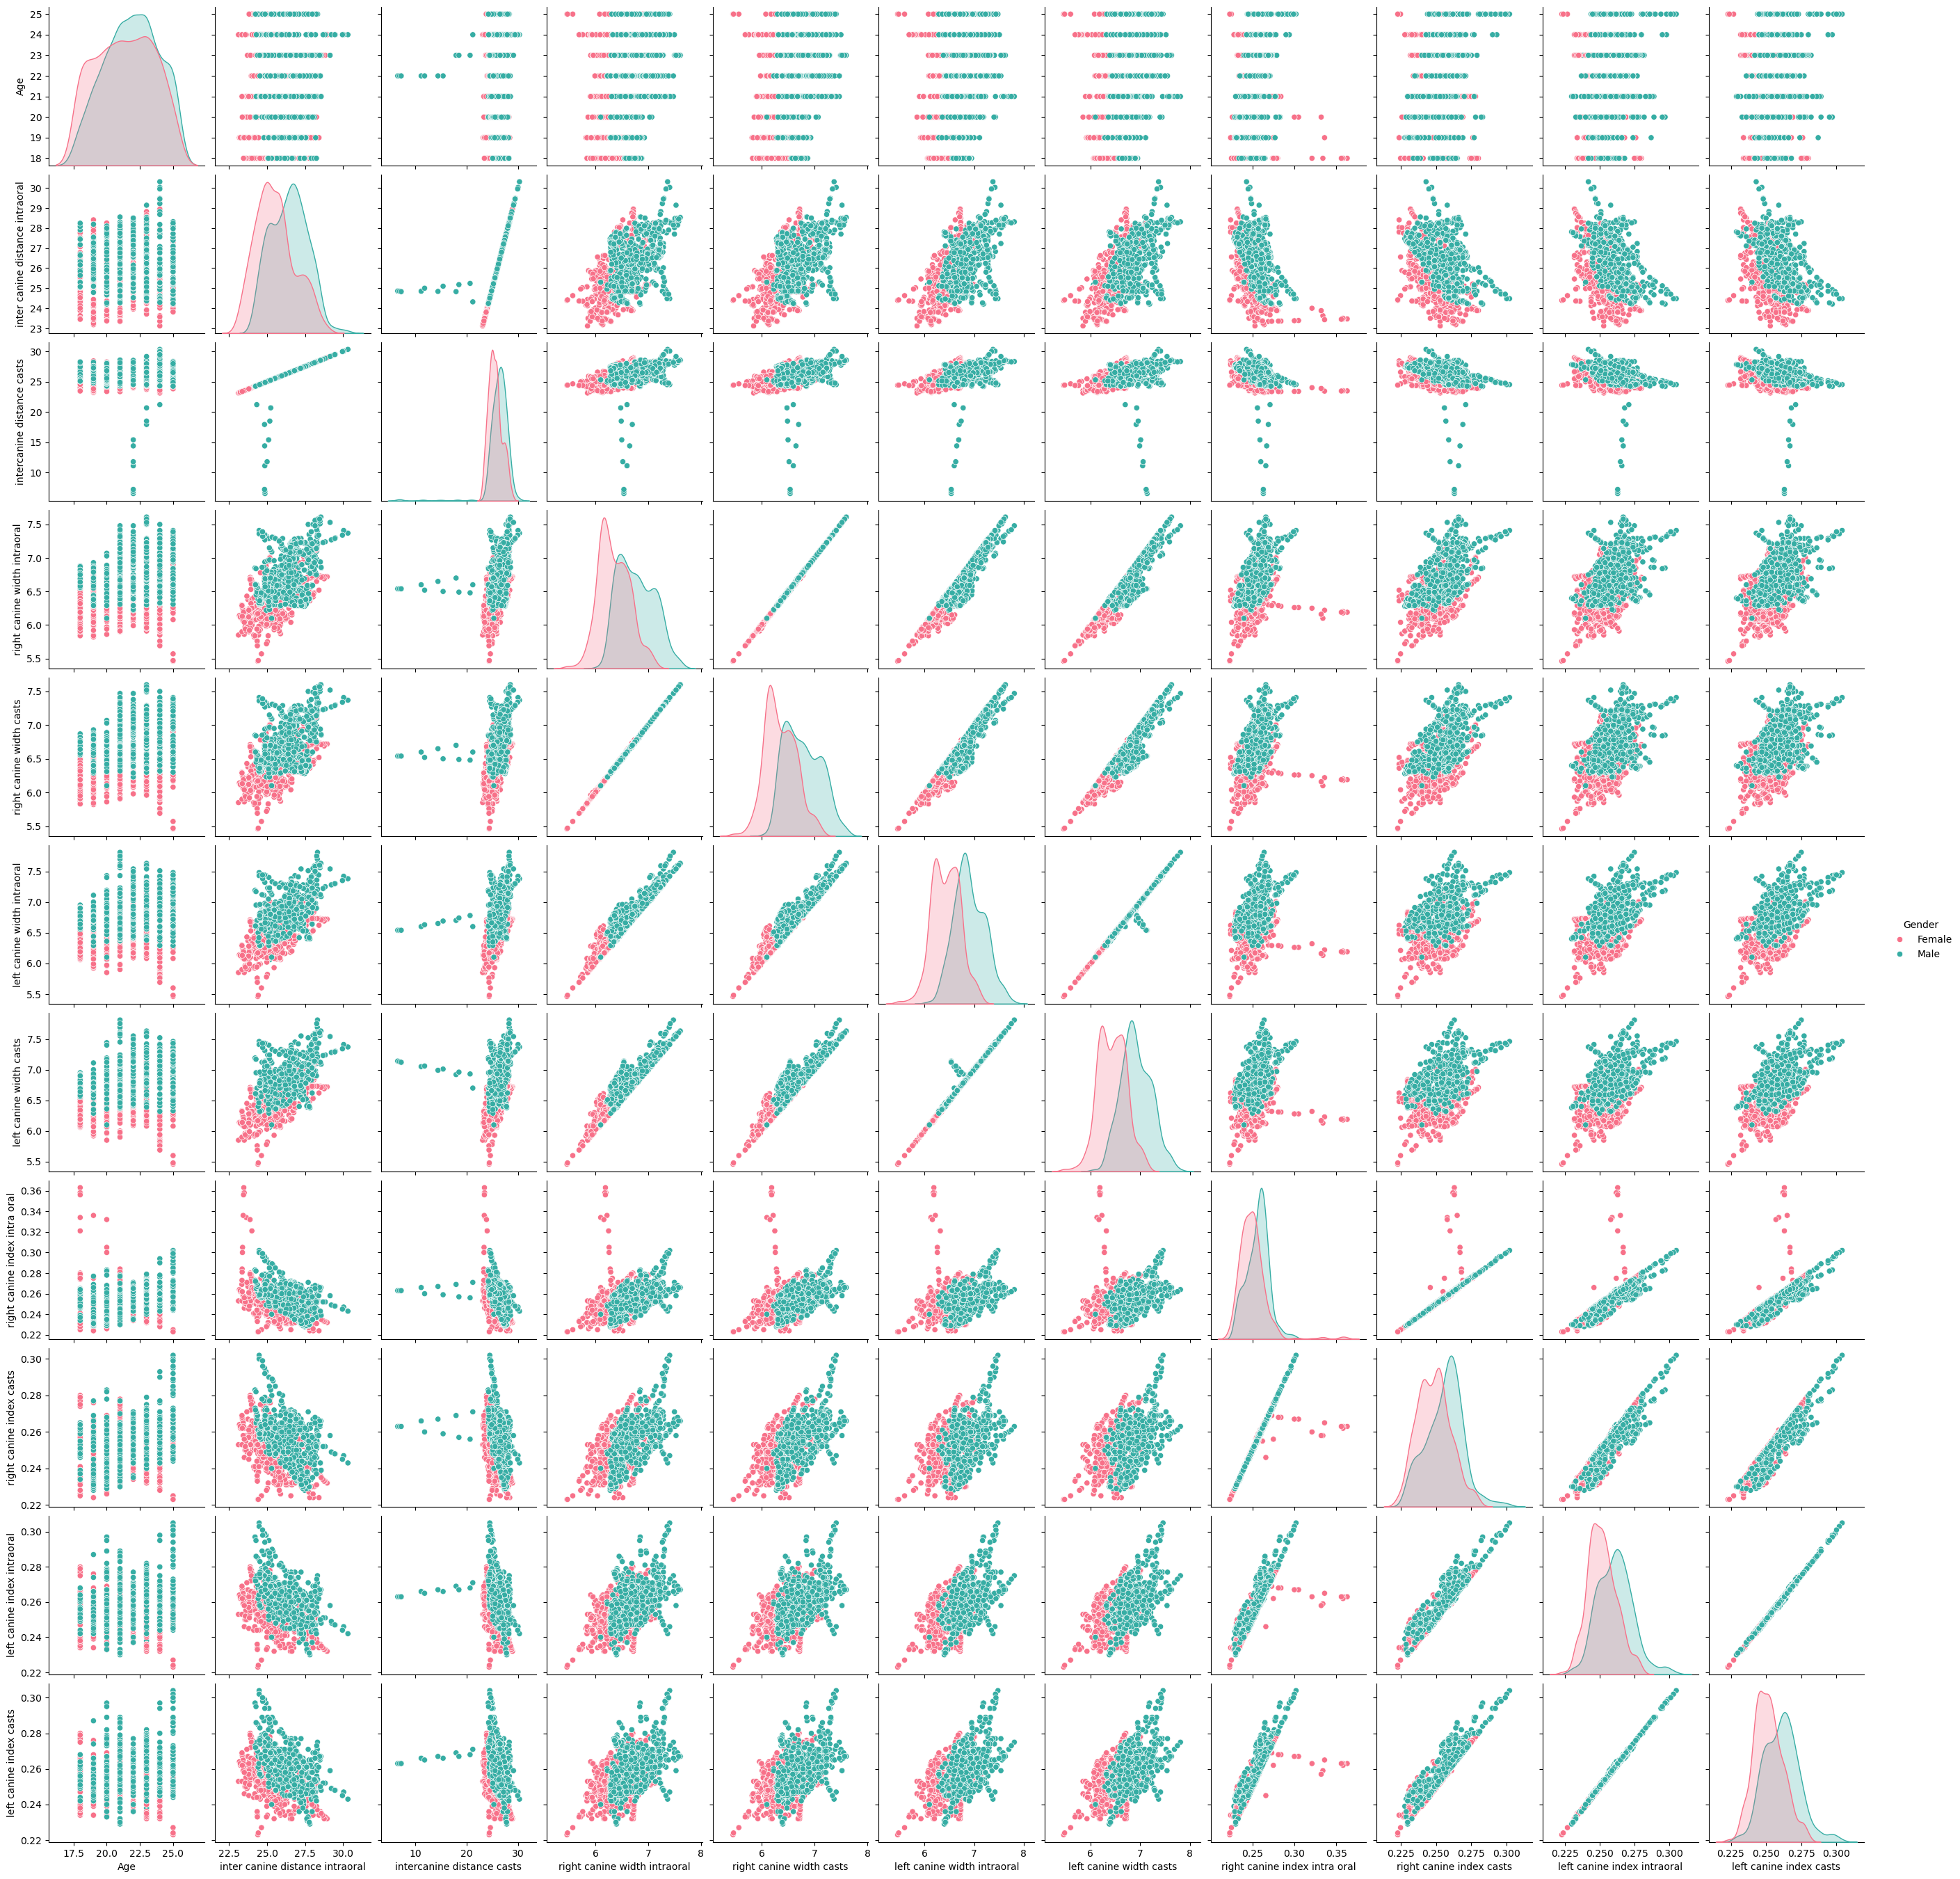

In [12]:
sns.pairplot(df, hue="Gender",palette="husl")
plt.show()

In [13]:
 # ii) Encoding categorical data 


# Labelencoding 
gender_labencoding = LabelEncoder()
df["Gender"] = gender_labencoding.fit_transform(df["Gender"])
df



,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,1,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,1,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,1,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,1,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [14]:
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [15]:

# iii)   Split independent and dependent variables i.e. X and Y


X=df.drop(["Gender"],axis=1)

In [16]:
Y=df["Gender"]

In [17]:
# iv)   Normalize the X variable      

normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)
X = pd.DataFrame(normalizer.fit_transform(X), columns = X.columns)

In [18]:
X

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,0.539364,0.563186,0.562961,0.136639,0.136639,0.136864,0.137088,0.005439,0.005439,0.005439,0.005416
1,0.495760,0.580940,0.581166,0.138137,0.138137,0.142644,0.142644,0.005341,0.005341,0.005566,0.005566
2,0.539971,0.559456,0.559456,0.138749,0.139923,0.147435,0.147435,0.005822,0.005822,0.006198,0.006198
3,0.455873,0.595370,0.595370,0.138585,0.138585,0.149526,0.149526,0.005288,0.005288,0.005698,0.005698
4,0.452767,0.596746,0.597878,0.137867,0.137867,0.147149,0.147149,0.005229,0.005229,0.005569,0.005569
...,...,...,...,...,...,...,...,...,...,...,...
1095,0.546300,0.552901,0.552901,0.149777,0.149777,0.150232,0.150232,0.006169,0.006169,0.006191,0.006191
1096,0.499659,0.572791,0.572791,0.152169,0.152169,0.154440,0.154440,0.006019,0.006019,0.006109,0.006109
1097,0.562550,0.545449,0.545449,0.148513,0.148513,0.148738,0.148738,0.006121,0.006121,0.006121,0.006121
1098,0.487798,0.577692,0.577692,0.152611,0.152611,0.154702,0.154702,0.006132,0.006132,0.006202,0.006202


In [19]:

# Step 5: Exploratory Data Analysis


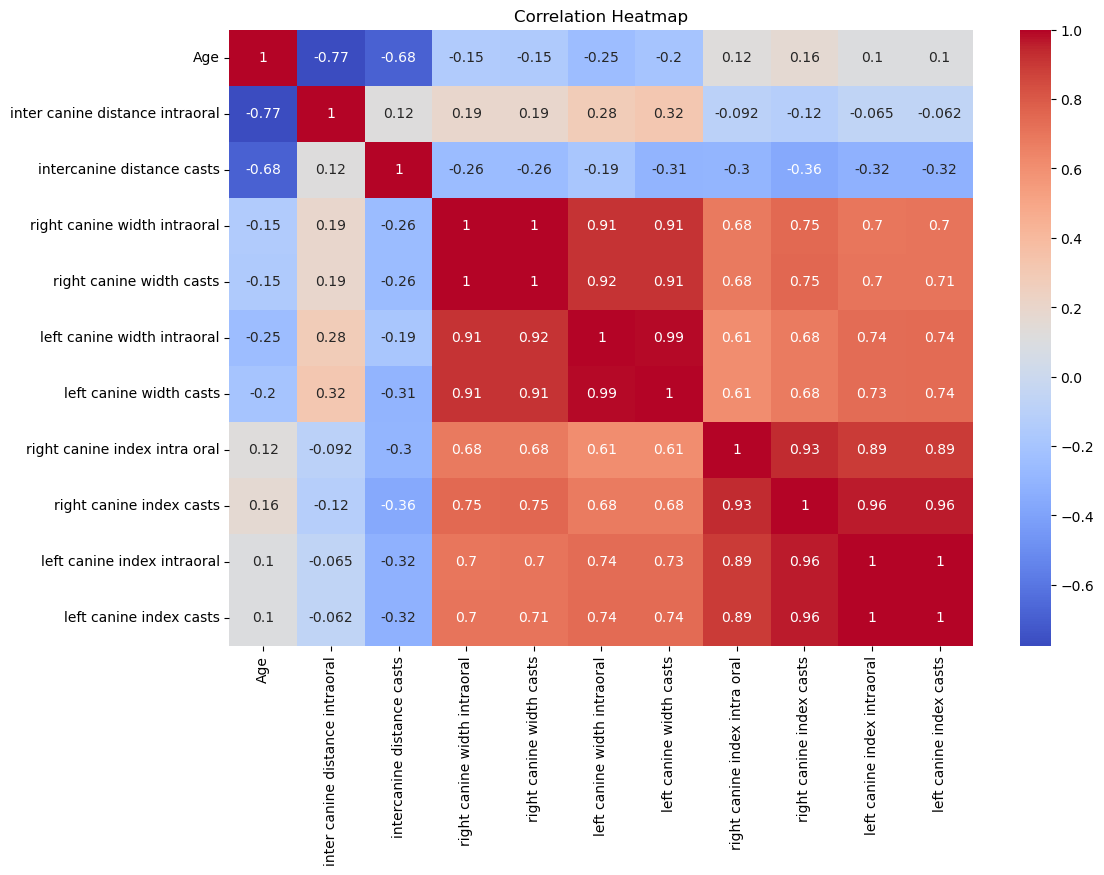

In [20]:
# i)You need to check the correlation of the data using Heatmap between X-to-X features and X-to-Y features to understand the relationship and collinearity issues between the features. (seaborn library)

plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(X).corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [21]:
# Step 6: Model Building 
# Split the Data into Train and Test set


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.3, random_state=42)


In [22]:
# logisticRegression

log_model= LogisticRegression()
log_model.fit(X_train, Y_train)
log_scores = log_model.predict_proba(X_test)[:,1]

In [23]:
print(log_model.score(X_train, Y_train))
print(log_model.score(X_test, Y_test))

0.6285714285714286
0.6515151515151515


In [24]:
#DecisionTreeClassifier
dt_model = DecisionTreeClassifier( min_samples_split=18,min_samples_leaf=16)
dt_model.fit(X_train, Y_train)
dt_scores = dt_model.predict_proba(X_test)[:,1]

In [25]:
print(dt_model.score(X_train, Y_train))
print(dt_model.score(X_test, Y_test))

0.8805194805194805
0.8333333333333334


In [26]:
# RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=16,min_samples_split=16, min_samples_leaf=12,n_estimators=100,random_state=52)
rf_model.fit(X_train, Y_train)
rf_scores = rf_model.predict_proba(X_test)[:,1]

In [27]:
print(rf_model.score(X_train, Y_train))
print(rf_model.score(X_test, Y_test))

0.9207792207792208
0.8424242424242424


In [28]:
# XGBClassifier
xgb_model = XGBClassifier(max_depth=13, min_child_weight=13, subsample=0.5, gamma=0.5 )
xgb_model.fit(X_train, Y_train)
xgb_scores = xgb_model.predict_proba(X_test)[:,1]

In [29]:
print(xgb_model.score(X_train, Y_train))
print(xgb_model.score(X_test, Y_test))

0.8623376623376623
0.8


In [30]:
# Step 7: Evaluation
# You need to evaluate the model based on the models evaluation metrics i.e. Confusion matrix(Accuracy), ROC curve and AUC curve to check model accuracy and plot them


In [31]:
# from the above models i am taking  this three models for the confusion metrics

In [32]:
#confusion metrics for XGB
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

In [33]:
pred_xgb=xgb_model.predict(X_test)

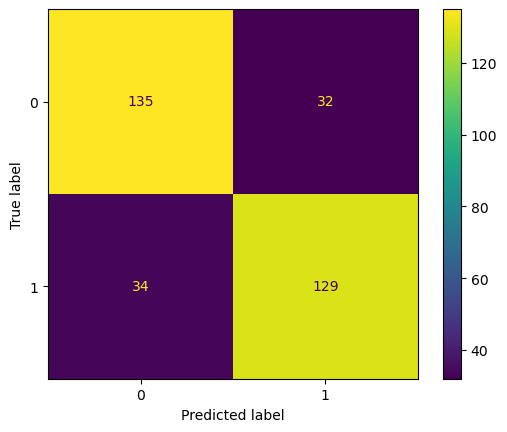

In [34]:
con_f1=ConfusionMatrixDisplay(confusion_matrix(pred_xgb,Y_test))
con_f1.plot()

In [35]:
TP=129
TN= 135
FP=32
FN=34

Accurancy=(TP + TN) / (TP + TN + FP + FN)
Accurancy

0.8

In [36]:
Precision=TP / (TP + FP)
Precision

0.8012422360248447

In [37]:
Recall=TP / (TP + FN)
Recall

0.7914110429447853

In [38]:
F1score= 2 * (Precision * Recall) / (Precision + Recall)
F1score

0.7962962962962963

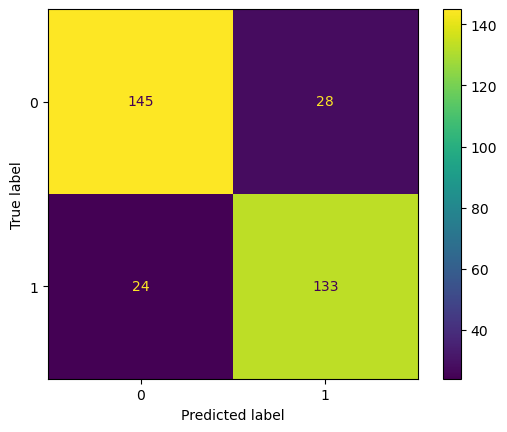

In [39]:
# #confusion metrics for random forest

pred_rf=rf_model.predict(X_test)
con_f2=ConfusionMatrixDisplay(confusion_matrix(pred_rf,Y_test))
con_f2.plot()

In [40]:
#I denoted R for random forest over here

TPR=133
TNR= 145
FPR=28
FNR=24

AccurancyR=(TPR + TNR) / (TPR + TNR+ FPR + FNR)
AccurancyR

0.8424242424242424

In [41]:
Precision_R=TPR/ (TPR + FPR)
Precision_R

0.8260869565217391

In [42]:
Recall_R= TPR / (TPR + FNR)
Recall_R

0.8471337579617835

In [43]:
F1score_R= 2 * (Precision_R * Recall_R) / (Precision_R + Recall_R)
F1score_R

0.8364779874213837

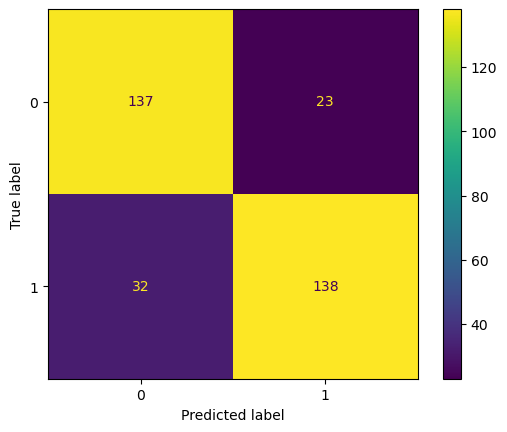

In [44]:
##confusion metrics for decision tree

pred_dt=dt_model.predict(X_test)
con_f2=ConfusionMatrixDisplay(confusion_matrix(pred_dt,Y_test))
con_f2.plot()  

In [45]:
TPD=138
TND= 135
FPD=23
FND=34

Accuracy_D=(TPD + TND) / (TPD + TND + FPD + FND)
Accuracy_D

0.8272727272727273

In [46]:
Precision_D=TPD/ (TPD + FPD)
Precision_D

0.8571428571428571

In [47]:
Recall_D=TPD / (TPD + FND) 
Recall_D

0.8023255813953488

In [48]:
F1score_D= 2 * (Precision_D * Recall_D) / (Precision_D + Recall_D)
F1score_D

0.8288288288288288

In [49]:
# ROC curve for Random forest model
rf_fpr,rf_tpr, rf_thresholds = roc_curve(Y_test, rf_scores)
rf_auc =roc_auc_score(Y_test, rf_scores)

In [50]:
# ROC curve for dt model
dt_fpr, dt_tpr, dt_thresholds = roc_curve(Y_test, dt_scores)
dt_auc = roc_auc_score(Y_test, dt_scores)

In [51]:

# ROC curve for xgb modeL
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(Y_test, xgb_scores)
xgb_auc =roc_auc_score(Y_test, xgb_scores)


In [52]:
#  ROC curve date for logistics regresssion model
log_fpr,log_tpr, log_thresholds = roc_curve(Y_test, log_scores)
log_auc =roc_auc_score(Y_test, log_scores)

In [ ]:
 # Random forest  ROC curve
trace0 = go.Scatter(
    x=rf_fpr,
    y=rf_tpr,
    mode='lines',
    name=f'Random forest (Area = {rf_auc:.2f})'
)

# decision Tree ROC curve
trace1 = go.Scatter(
    x=dt_fpr,
    y=dt_tpr,
    mode='lines',
    name=f'dt (Area = {dt_auc:.2f})')

#  Logistic ROC curve
trace2 = go.Scatter(
    x=log_fpr,
    y=log_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {log_auc:.2f})'
)



#  xgb ROC curve
trace3 = go.Scatter(
    x=xgb_fpr,
    y=xgb_tpr,
    mode='lines',
    name=f'rgb (Area = {xgb_auc:.2f})'
    
)


trace4 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2, trace3, trace4  ]


layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)


fig = go.Figure(data=data, layout=layout)


fig.show()


In [ ]:
# SO AT LAST I CAN SAY RANDOM FORST IS GOOD MODEL THEN OTHERS
